<a href="https://colab.research.google.com/github/as183789043/Titanic-Survival-Prediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
!pip install -U scikit-learn

In [150]:
import pandas as pd
import numpy as np

## 載入資料和檢索

In [151]:
train_data=pd.read_csv('./train.csv')

In [152]:
train_data.shape

(891, 12)

In [153]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 資料清理


In [155]:
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### 平均值


In [156]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

In [157]:
train_data['Age'].mean()

29.69911764705882

### 眾數填充embarked

In [158]:
train_data['Embarked'].mode()[0]

'S'

In [159]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [160]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [161]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


## 資料特徵工程
### One-Hot-Econder 適用類別資料(Sex,Embarked)
### Standard Scaling 適用數值資料正規化(Age,Fare)

In [162]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# One Hot Encoder Sex
emconded_sex = one.fit_transform(train_data[['Sex']])
encoded_columns = one.get_feature_names_out(['Sex'])
df_sex = pd.DataFrame(emconded_sex, columns=encoded_columns)
df_sex

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [163]:
# One Hot Encoder embarked
encoded_embarked = one.fit_transform(train_data[['Embarked']])

#取得column name
encoded_columns = one.get_feature_names_out(['Embarked'])

df_embarked = pd.DataFrame(encoded_embarked, columns=encoded_columns)
df_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [164]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


### Standard Scale

In [165]:
##Standard Scale
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age', 'Fare']

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(train_data[numeric_features])
#加上欄位名稱
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_features)
df_scaled_numeric

,Age,Fare
0,-0.592481,-0.502445
1,0.638789,0.786845
2,-0.284663,-0.488854
3,0.407926,0.420730
4,0.407926,-0.486337
...,...,...
886,-0.207709,-0.386671
887,-0.823344,-0.044381
888,0.000000,-0.176263
889,-0.284663,-0.044381


## 合併特徵工程後的Column進DataFrame

In [166]:
#取得舊資料集的所有Column
train_data.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [167]:
#將存活率與ID單獨取出並刪除已進行特徵工程的資料集
y_train = train_data['Survived']
passenger_id=train_data[['PassengerId']]
passenger_id,y_train

(     PassengerId
 0              1
 1              2
 2              3
 3              4
 4              5
 ..           ...
 886          887
 887          888
 888          889
 889          890
 890          891
 
 [891 rows x 1 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [168]:
X_train = train_data.drop(['PassengerId', 'Survived','Sex','Embarked','Age','Fare'], axis=1)

In [169]:
X_train

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0
...,...,...,...
886,2,0,0
887,1,0,0
888,3,1,2
889,1,0,0


### 合併特徵工程之後的dataframe

In [170]:
print(X_train.shape)
print(df_scaled_numeric.shape)
print(df_embarked.shape)

(891, 3)
(891, 2)
(891, 3)


In [171]:
# 確保索引一致
X_train.reset_index(drop=True, inplace=True)
df_scaled_numeric.reset_index(drop=True, inplace=True)
df_embarked.reset_index(drop=True, inplace=True)
df_sex.reset_index(drop=True, inplace=True)

# 合併
X_train = pd.concat([X_train, df_scaled_numeric, df_embarked,df_sex], axis=1)

# 移除重複列（如果有）
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

# 確認結果
print(X_train.shape)  # 應該是 (891, 10)
print(X_train.head())


(891, 10)
   Pclass  SibSp  Parch       Age      Fare  Embarked_C  Embarked_Q  \
0       3      1      0 -0.592481 -0.502445         0.0         0.0   
1       1      1      0  0.638789  0.786845         1.0         0.0   
2       3      0      0 -0.284663 -0.488854         0.0         0.0   
3       1      1      0  0.407926  0.420730         0.0         0.0   
4       3      0      0  0.407926 -0.486337         0.0         0.0   

   Embarked_S  Sex_female  Sex_male  
0         1.0         0.0       1.0  
1         0.0         1.0       0.0  
2         1.0         1.0       0.0  
3         1.0         1.0       0.0  
4         1.0         0.0       1.0  


## 檢查轉換的數據是否對齊使用者

In [172]:
user_data = X_train.iloc[0:5][:]
print(user_data)

   Pclass  SibSp  Parch       Age      Fare  Embarked_C  Embarked_Q  \
0       3      1      0 -0.592481 -0.502445         0.0         0.0   
1       1      1      0  0.638789  0.786845         1.0         0.0   
2       3      0      0 -0.284663 -0.488854         0.0         0.0   
3       1      1      0  0.407926  0.420730         0.0         0.0   
4       3      0      0  0.407926 -0.486337         0.0         0.0   

   Embarked_S  Sex_female  Sex_male  
0         1.0         0.0       1.0  
1         0.0         1.0       0.0  
2         1.0         1.0       0.0  
3         1.0         1.0       0.0  
4         1.0         0.0       1.0  


In [173]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [174]:
print(X_train.isnull().sum())

Pclass        0
SibSp         0
Parch         0
Age           0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64


## 數據分布


In [175]:
X_train.describe()

,Pclass,SibSp,Parch,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,2.232906e-16,3.987333e-18,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.836071,1.102743,0.806057,1.000562e+00,1.000562e+00,0.391372,0.281141,0.446751,0.477990,0.477990
min,1.000000,0.000000,0.000000,-2.253155e+00,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,-5.924806e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000e+00,-3.573909e-01,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,4.079260e-01,-2.424635e-02,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,8.000000,6.000000,3.870872e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000


## 訓練模型 隨機森林


In [176]:
# 訓練隨機森林模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 設置 K-fold 交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 執行 K-fold 交叉驗證
scores = cross_val_score(model, X_train, y_train, cv=kf)
print(f"Cross-validated accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validated accuracy scores: [0.82122905 0.80337079 0.84269663 0.8258427  0.83146067]
Mean accuracy: 0.8249199673592367


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# 創建特徵重要性的 DataFrame
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
4,Fare,0.258218
3,Age,0.252808
9,Sex_male,0.166447
8,Sex_female,0.114872
0,Pclass,0.089056
1,SibSp,0.048368
2,Parch,0.036393
7,Embarked_S,0.013599
5,Embarked_C,0.012935
6,Embarked_Q,0.007303


<ipython-input-178-6480a1a40763>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


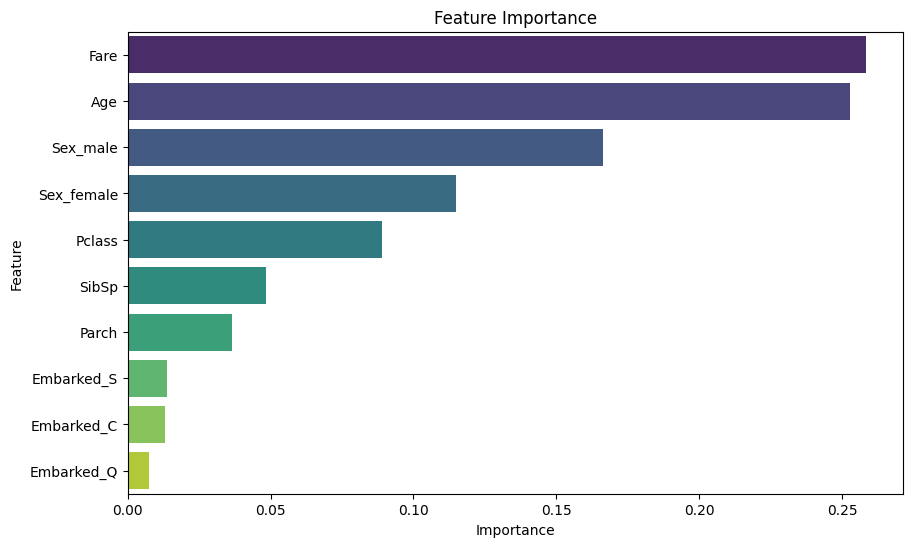

In [178]:
# 繪製特徵重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## 導入Test.csv驗證模型

In [179]:
test_data=pd.read_csv('./test.csv')

In [180]:
test_data.shape

(418, 11)

### 資料處理

In [181]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [182]:
test_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
test_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


##測試集特徵工程

In [183]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# One Hot Encoder Sex
emconded_sex = one.fit_transform(test_data[['Sex']])
encoded_columns = one.get_feature_names_out(['Sex'])
df_sex = pd.DataFrame(emconded_sex, columns=encoded_columns)

# One Hot Encoder embarked
encoded_embarked = one.fit_transform(test_data[['Embarked']])

#取得column name
encoded_columns = one.get_feature_names_out(['Embarked'])

df_embarked = pd.DataFrame(encoded_embarked, columns=encoded_columns)

##Standard Scale
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age', 'Fare']

scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(test_data[numeric_features])
#加上欄位名稱
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_features)
df_scaled_numeric

#刪除已進行特徵工程的資料集
X_test = test_data.drop(['PassengerId','Sex','Embarked','Age','Fare'], axis=1)

In [184]:
# 確保索引一致
X_test.reset_index(drop=True, inplace=True)
df_scaled_numeric.reset_index(drop=True, inplace=True)
df_embarked.reset_index(drop=True, inplace=True)
df_sex.reset_index(drop=True, inplace=True)

# 合併
X_test = pd.concat([X_test, df_scaled_numeric, df_embarked,df_sex], axis=1)

# 移除重複列（如果有）
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# 確認結果
print(X_test.shape)  # 應該是 (418, 10)
print(X_test.head())


(418, 10)
   Pclass  SibSp  Parch       Age      Fare  Embarked_C  Embarked_Q  \
0       3      0      0 -0.543817 -0.497811         0.0         0.0   
1       3      1      0  0.720462 -0.512660         1.0         0.0   
2       2      0      0 -0.227747 -0.464532         0.0         0.0   
3       3      0      0  0.483410 -0.482888         0.0         0.0   
4       3      1      1  0.483410 -0.417971         0.0         0.0   

   Embarked_S  Sex_female  Sex_male  
0         1.0         0.0       1.0  
1         0.0         1.0       0.0  
2         1.0         0.0       1.0  
3         1.0         0.0       1.0  
4         1.0         1.0       0.0  


## 資料預測和保存結果

In [185]:
y_pred = model.predict(X_test)

In [186]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

# 儲存為 CSV 檔案
submission.to_csv('submission.csv', index=False)